# 1. Data Processing

## 1.1. Read Data

In [48]:
rm(list =ls())
library(MASS)

data = read.csv("BodyFat.csv")
data = data[c(-1,-3)] # Rrmove indexes and density
head(data)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


## 1.2. Simple Linear Regression

In [49]:
lm.naive = lm(BODYFAT~., data = data)
summary(lm.naive)


Call:
lm(formula = BODYFAT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2573  -2.5919  -0.1031   2.9040   9.2754 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.519e+01  1.611e+01  -0.943   0.3467    
AGE          5.688e-02  3.003e-02   1.894   0.0594 .  
WEIGHT      -8.130e-02  4.989e-02  -1.630   0.1045    
HEIGHT      -5.307e-02  1.034e-01  -0.513   0.6084    
ADIPOSITY    6.101e-02  2.780e-01   0.219   0.8265    
NECK        -4.450e-01  2.184e-01  -2.037   0.0427 *  
CHEST       -3.087e-02  9.779e-02  -0.316   0.7526    
ABDOMEN      8.790e-01  8.545e-02  10.286   <2e-16 ***
HIP         -2.031e-01  1.371e-01  -1.481   0.1398    
THIGH        2.274e-01  1.356e-01   1.677   0.0948 .  
KNEE        -9.927e-04  2.298e-01  -0.004   0.9966    
ANKLE        1.572e-01  2.076e-01   0.757   0.4496    
BICEPS       1.485e-01  1.600e-01   0.928   0.3543    
FOREARM      4.297e-01  1.849e-01   2.324   0.0210 *  
WRIST     

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

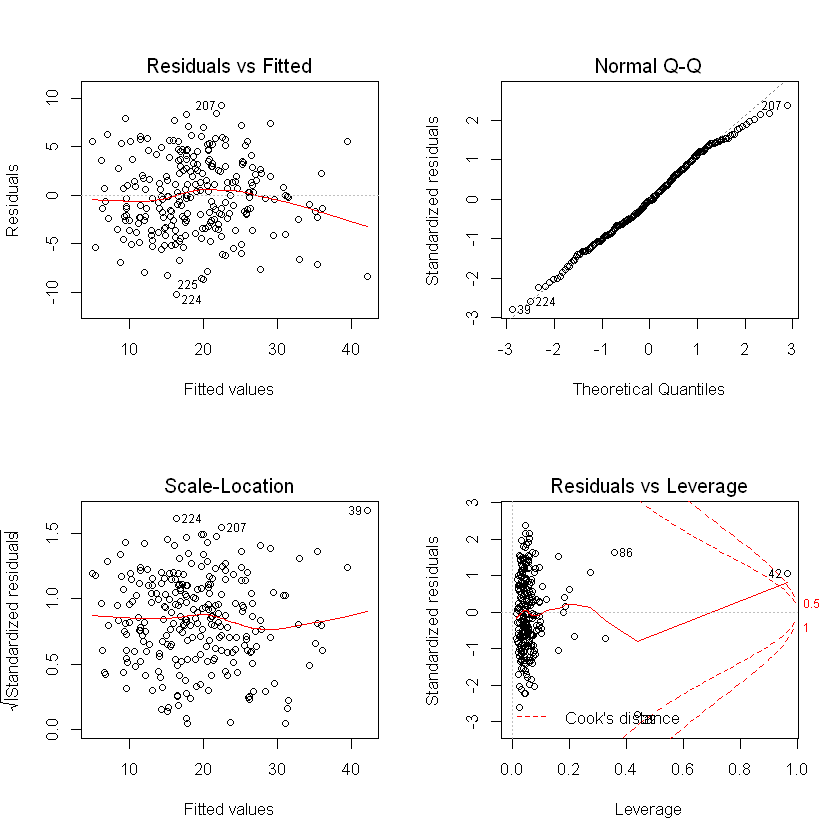

In [50]:
par(mfrow = c(2,2))
plot(lm.naive)
par(mfrow = c(1,1))

## 1.3. Identify Outliers And Strong Influential Points

### 1.3.1. Studentized Residual

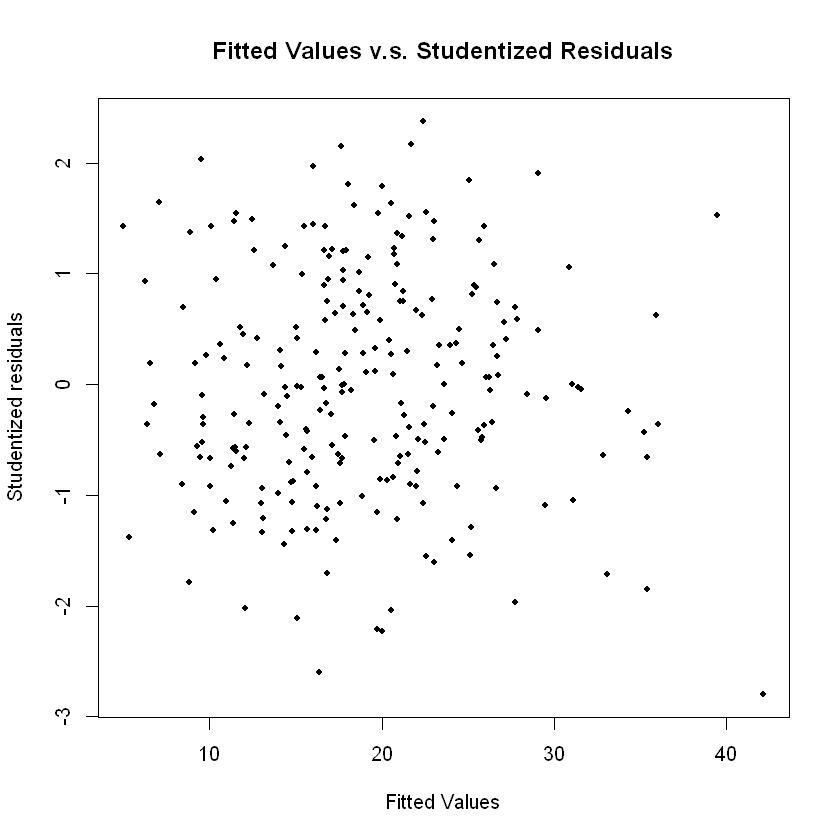

In [54]:
index = 1:dim(data)[1]
lm.stdres = stdres(lm.naive)
plot(x = lm.naive$fitted.values, y = lm.stdres, ylab = "Studentized residuals", xlab = "Fitted Values", 
     main = "Fitted Values v.s. Studentized Residuals", pch = 20)
#text(y = lm.stdres[which(abs(lm.stdres)>3)], x = lm.naive$fitted.values[which(abs(lm.stdres)>3)], 
#     labels = index[which(abs(lm.stdres)>3)], cex = 1, pos = 3)

### 1.3.2. Leverage Value

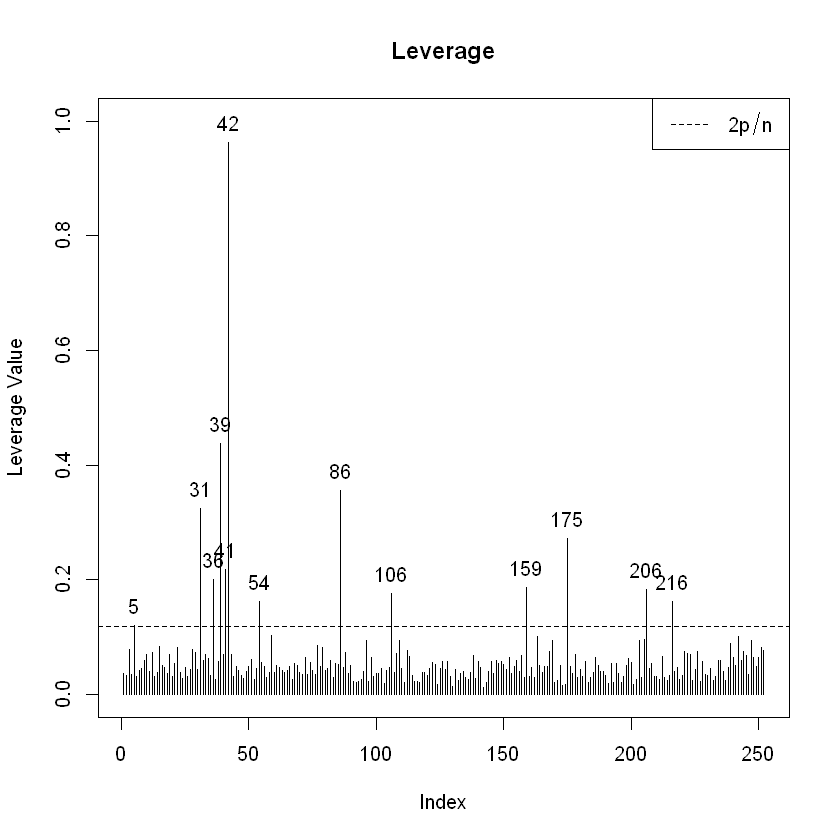

In [55]:
lm.hats=hatvalues(lm.naive)
plot(lm.hats, type = "h", ylim = c(0, 1), ylab = "Leverage Value", main = "Leverage") 
h0 = 30/252 # Rule of thumb for judging outliers
text(y = lm.hats[lm.hats>h0], x = which(lm.hats>h0), labels = which(lm.hats>h0), cex = 1, pos = 3)
abline(h = h0, lty = 2)
legend("topright", legend = expression(2*p/n), lty = 2)

### 1.3.3. DFFITS

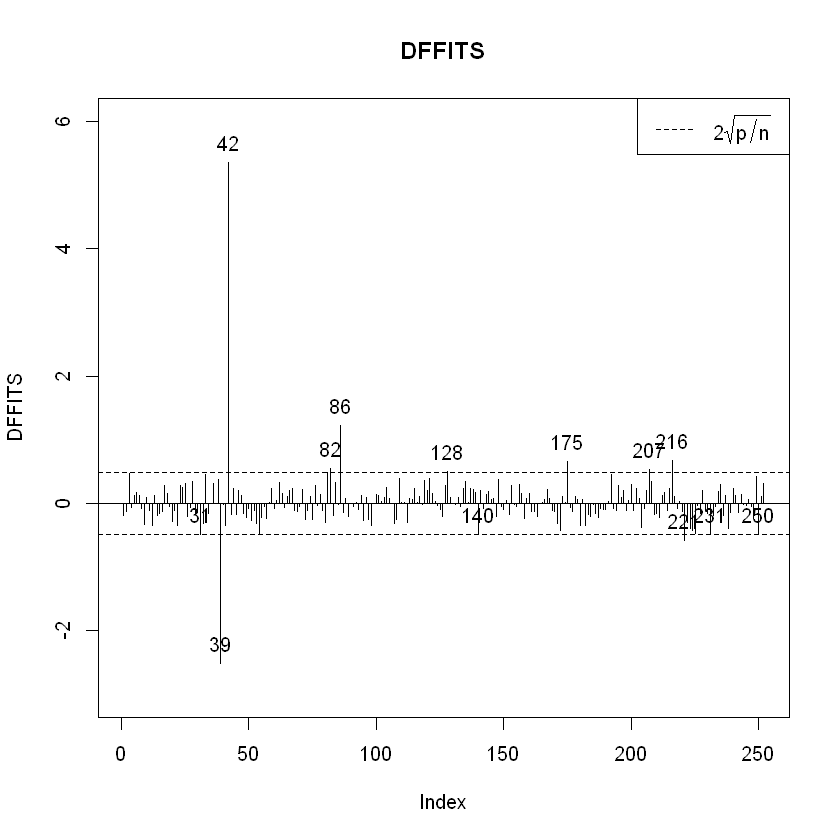

In [56]:
lm.dffits = dffits(lm.naive)
plot(lm.dffits, type = "h", ylim = c(-3, 6), ylab = "DFFITS", main = "DFFITS")
d0 = 2*sqrt(15/252) # Rule of thumb for judging influential points
text(y = lm.dffits[abs(lm.dffits)>d0], x = which(abs(lm.dffits)>d0), labels = which(abs(lm.dffits)>d0), cex = 1, pos = 3)
abline(h = c(-1*d0, 0, d0), lty = c(2,1,2))
legend("topright", legend = expression(2*sqrt(p/n)), lty = 2)

### 1.3.4. Cook's Distance

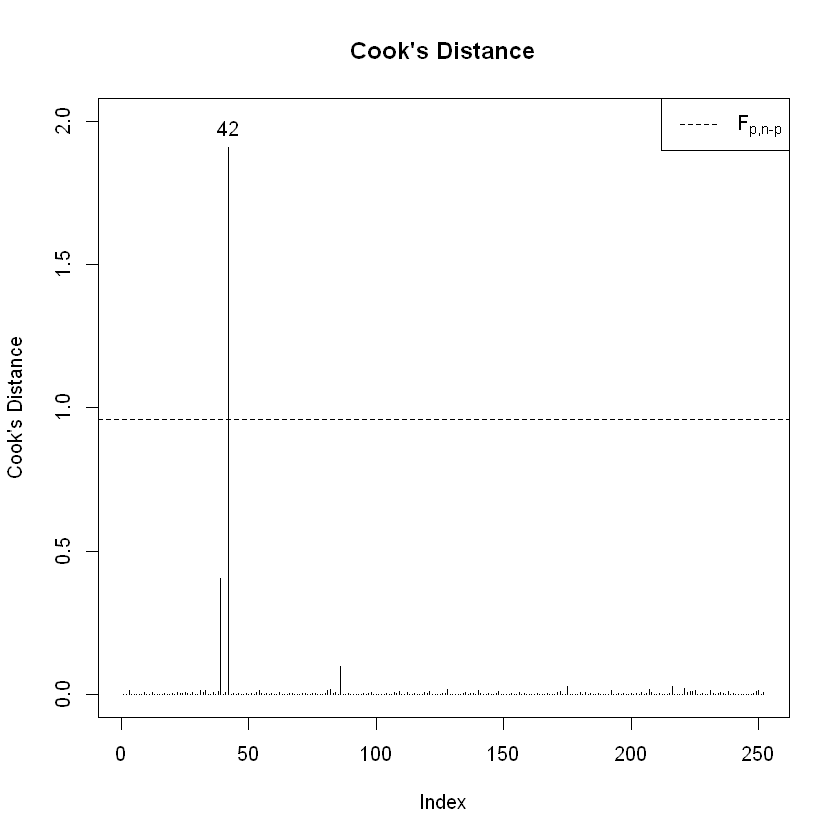

In [57]:
lm.cooksD=cooks.distance(lm.naive)
plot(lm.cooksD, type = "h", ylim = c(0, 2), ylab = "Cook's Distance", main = "Cook's Distance")
c0 = qf(0.5, 15, 237)
text(y = lm.cooksD[lm.cooksD>c0], x = which(lm.cooksD>c0), labels = which(lm.cooksD>c0), cex = 1, pos = 3)
abline(h = c0, lty = 2)
legend("topright", legend = expression(F[paste("p,n-p", sep="")]), lty = 2)

### 1.3.5. Points To Move

In [58]:
data[which(lm.hats>h0 & abs(lm.dffits)>d0 & lm.cooksD>c0),]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,31.7,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


Point NO.42 seems to be quite different from others because its height is far less than normal. NO.42 also has very large Leverage value, DFFITS value and Cook's Distance at the same time. This point can be seen as an outlier. 

In [59]:
data[which(lm.hats>h0 & abs(lm.dffits)>d0),]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
31,12.3,32,182.00,73.75,23.6,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,31.7,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
175,24.6,36,226.75,71.75,31.0,41.5,115.3,108.8,114.4,69.2,42.4,24.0,35.4,21.0,20.1
216,45.1,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


These Points have both large leverage value and DFFITS.